<a href="https://colab.research.google.com/github/Barikko/Yandex.Practicum-Projects/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B1%D0%B8%D0%B7%D0%BD%D0%B5%D1%81-%D0%BF%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ бизнес-показателей

Цель данного проекта: проанализировать рекламную кампанию развлекательного приложения Procrastinate Pro+, которая терпит убытки, несмотря на большие вложения. Будут проанализированы данные о пользователях, ид покупки и рекламные расходы, чтобы найти причины убытков.

Для этого будет изучено:

- откуда приходят пользователи и какими устройствами они пользуются
- сколько стоит привлечение пользователей из различных рекламных каналов
- сколько денег приносит каждый клиент
- когда расходы на привлечение клиента окупаются
- какие факторы мешают привлечению клиентов

# Загрузка данных и подготовка их к анализу

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [41]:
visits, orders, costs = (
    pd.read_csv('/content/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/content/orders_info_short.csv'),  # покупки
    pd.read_csv('/content/costs_info_short.csv'),  # траты на рекламу
)

## Предобработка visits:

In [42]:
visits.info()
visits.columns = ['user_id','region','device','channel','session_start','session_end']
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
print(visits.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
        user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019

In [43]:
print(visits.isna().sum())
print(visits['region'].unique())
print(visits['device'].unique())
print(visits['channel'].unique())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64
['United States' 'UK' 'France' 'Germany']
['iPhone' 'Mac' 'Android' 'PC']
['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


Пропусков и дубликатов не обнаружено, столбцы переименованы, формат для даты был изменен.

## Предобработка orders:

In [44]:
orders.info()
orders.columns = ['user_id','event_dt','revenue']
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
print(orders.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
        user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99


In [45]:
print(orders.isna().sum())

user_id     0
event_dt    0
revenue     0
dtype: int64


Пропусков не обнаружено, формат для даты был изменен.

##Предобработка costs:

In [46]:
costs.info()
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
costs.columns = costs.columns.str.lower()
print(costs.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
           dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1


In [47]:
print(costs.isna().sum())
print(costs['channel'].unique())

dt         0
channel    0
costs      0
dtype: int64
['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


Пропусков и дубликатов не обнаружено, формат для даты был изменен.

# Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функция get_profiles():

In [48]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].astype('datetime64[W]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция get_retention():

In [49]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция get_conversion():

In [50]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функция get_ltv():

In [51]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

filter_data():

In [52]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

plot_retention():

In [53]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

plot_conversion():

In [54]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


plot_ltv_roi():

In [55]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Исследовательский анализ данных

## Создание профилей пользователей, минимальной и максимальной даты привлечения пользователей.

In [56]:
profiles = get_profiles(visits, orders,[], costs)
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14

In [57]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
print(min_date, max_date)

2019-05-01 2019-10-27


## Таблица, отражающую количество пользователей и долю платящих из каждой страны:

In [58]:
profiles.groupby('region').agg({'user_id':'count','payer':'mean'}).sort_values(by='payer',ascending=False)\
.style.format({'payer':'{:.2%}'})

,user_id,payer
region,,
United States,100002,6.90%
Germany,14981,4.11%
UK,17575,3.98%
France,17450,3.80%


Более 100 000 пользователей из США, среди которых 6,9% платящих пользователей, что больше, чем в остальных регионах, в которых пользователей от 15 до 17,5 тысяч с долей платящих около 4%.

##  Таблица, отражающая количество пользователей и долю платящих для каждого устройства:

In [59]:
profiles.groupby('device').agg({'user_id':'count','payer':'mean'}).sort_values(by='payer',ascending=False)\
.style.format({'payer':'{:.2%}'})

,user_id,payer
device,,
Mac,30042,6.36%
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%


Самый популярный девайс пользователей - iPhone (54479 пользователей), в то время как остальные девайсы (Mac, Android, PC) имеют от 30 до 35 тысяч пользователей. Но наибольший процент плательщиков у Mac юзеров - 6,36%, что на 0,15% больше по сравнению с iPhone.

##  Таблица, отражающая количество пользователей и долю платящих для каждого канала привлечения.

In [60]:
profiles.groupby('channel').agg({'user_id':'count','payer':'mean'}).sort_values(by='payer',ascending=False)\
.style.format({'payer':'{:.2%}'})

,user_id,payer
channel,,
FaceBoom,29144,12.20%
AdNonSense,3880,11.34%
lambdaMediaAds,2149,10.47%
TipTop,19561,9.60%
RocketSuperAds,4448,7.91%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%
MediaTornado,4364,3.57%
LeapBob,8553,3.06%


Топ 3 принёсших пользователей каналов, не считая органического - FaceBoom (29144 пользователей), TipTop (19561 пользователей),  WahooNetBanner и LeapBob (оба по 8553 пользователей). Топ по проценту плательщиков - FaceBoom (12,2%), AdNonSense (11,34%), lambdaMediaAds (10,47%), хотя у последних двух самое низкое количество пользователей в списке (3880 и 2149 соответственно).

# Маркетинг

## Общая сумма расходов на маркетинг:

In [61]:
print(costs['costs'].sum())

105497.30000000002


Общая сумма расходов - 105497 у.е.

### Распределенение трат по рекламным источникам:

In [62]:
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Самые дорогие источники - TipTop и FaceBoom с большим отдалением от остальных (54751 и 32446 у.е.) Самые дешёвые - MediaTornado и YRabbit, стоящих меньше 1000.

## Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику:

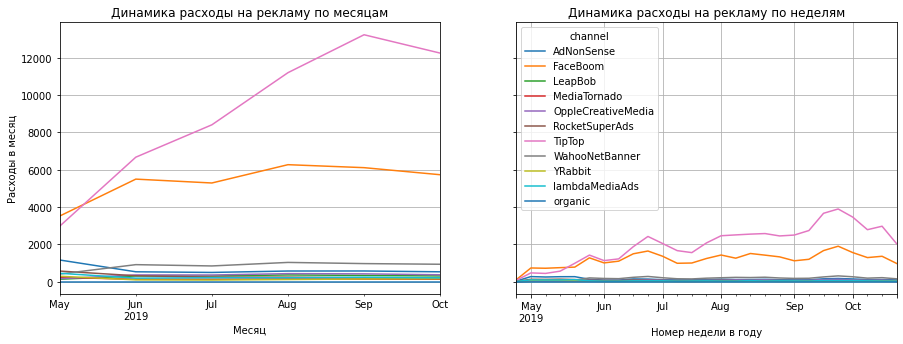

In [63]:
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)

profiles.pivot_table(
    index = 'month', 
    columns='channel',
    values = 'acquisition_cost', 
    aggfunc= 'sum'
).plot( 
    grid=True, 
    ax=ax1, 
    legend = False)
plt.title('Динамика расходы на рекламу по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы в месяц')

ax2 = plt.subplot(1, 2, 2, sharey = ax1)

profiles.pivot_table(
    index = 'week', 
    columns='channel',values = 'acquisition_cost', aggfunc= 'sum'
).plot(grid=True, 
       ax=ax2)

plt.title('Динамика расходы на рекламу по неделям')
plt.xlabel('Номер недели в году')
plt.ylabel('Расходы за неделю')
plt.show()

С каждым месяцев расходы на рекламу TipTop и FaceBoom растут, доходя до >12к и 6к расходов в месяц соответственно, но с Августа-Сентября начинают снижаться. Остальные источники находятся на одном уровне, кроме незначительного отрыва RocketSuperAds. Недельные расходы имеют почти такую же динамику.

## Среднее САС из каждого источника:

In [64]:
display(profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost',ascending=False))
print('Средний САС по всему проекту:{:.3f}'.format(profiles['acquisition_cost'].mean()))

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Средний САС по всему проекту:0.703


TipTop, FaceBoom, AdNonSense являются самыми дорогими источниками, каждый пользователь стоит 2.8, 1.11, 1.01 расходов соответственно. Самые дешёвые источники - YRabbit, MediaTornado, LeapBob с ценой менее 0.22 за пользователя.

# Окупаемость рекламы

In [65]:
#удаляем органических пользователей
profiles=profiles.query('channel!="organic"')

##  Окупаемость рекламы:

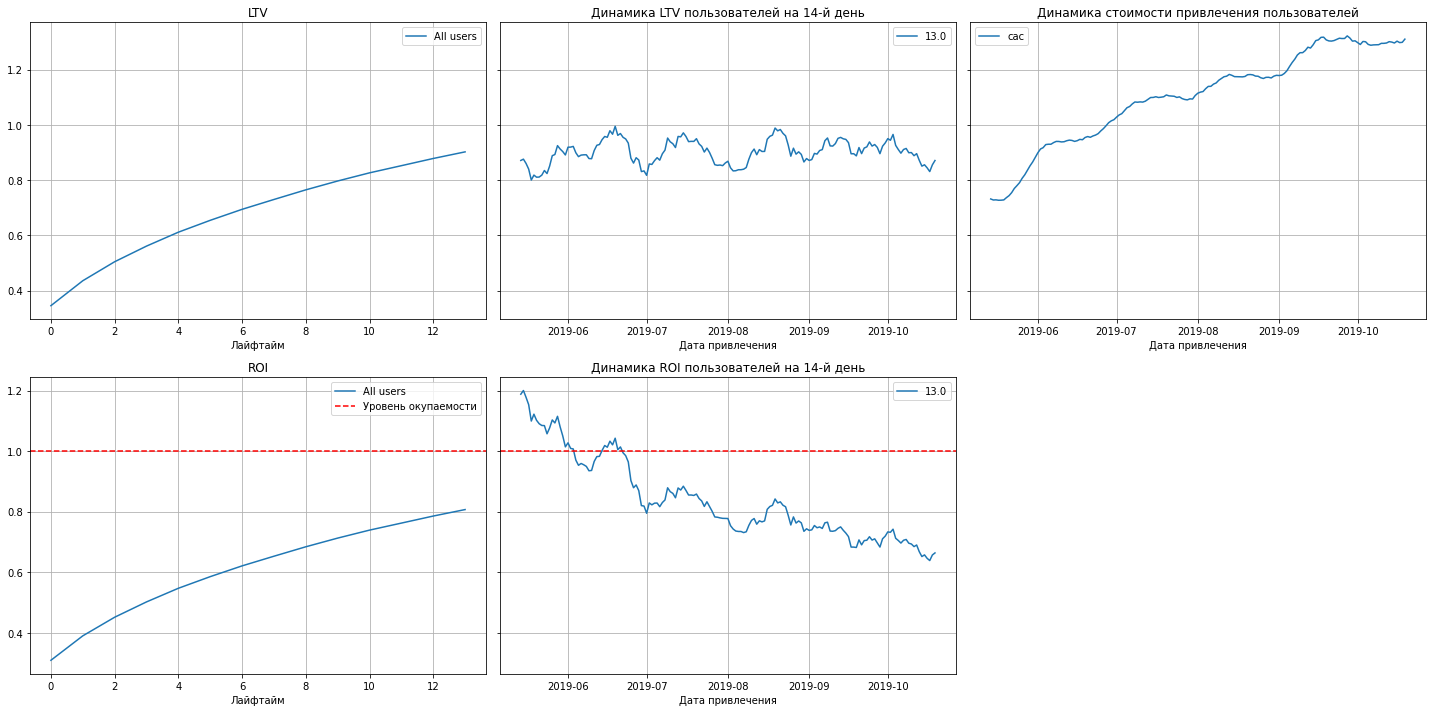

In [66]:
dimensions = []

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Реклама не окупается, ROI к 14 не достигает и 100%. Явная проблема - постоянно растущий САС. LTV достаточно стабилен, даже учитывая сезонный фактор.

## Конверсия пользователей и динамика её изменения:

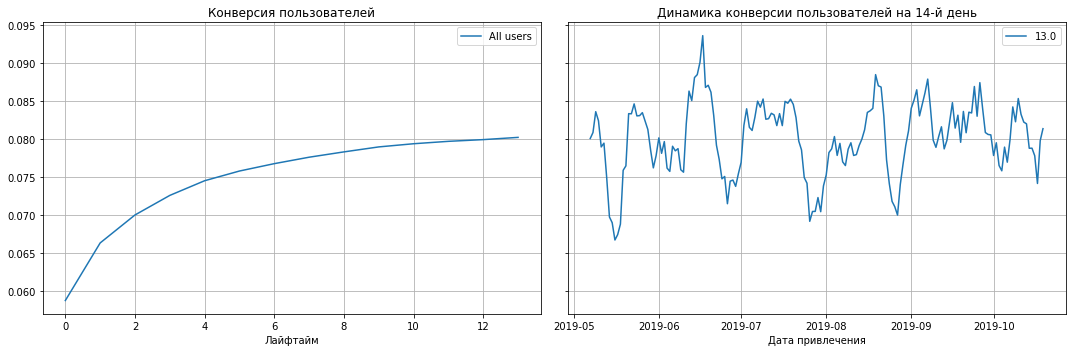

In [67]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, ignore_horizon=False
)

plot_conversion(conversion, conversion_history, horizon_days) 

К 14 дню конверсия составляет около 0.057, её динамика стабильна.

## Удержание пользователей и динамика её изменения:

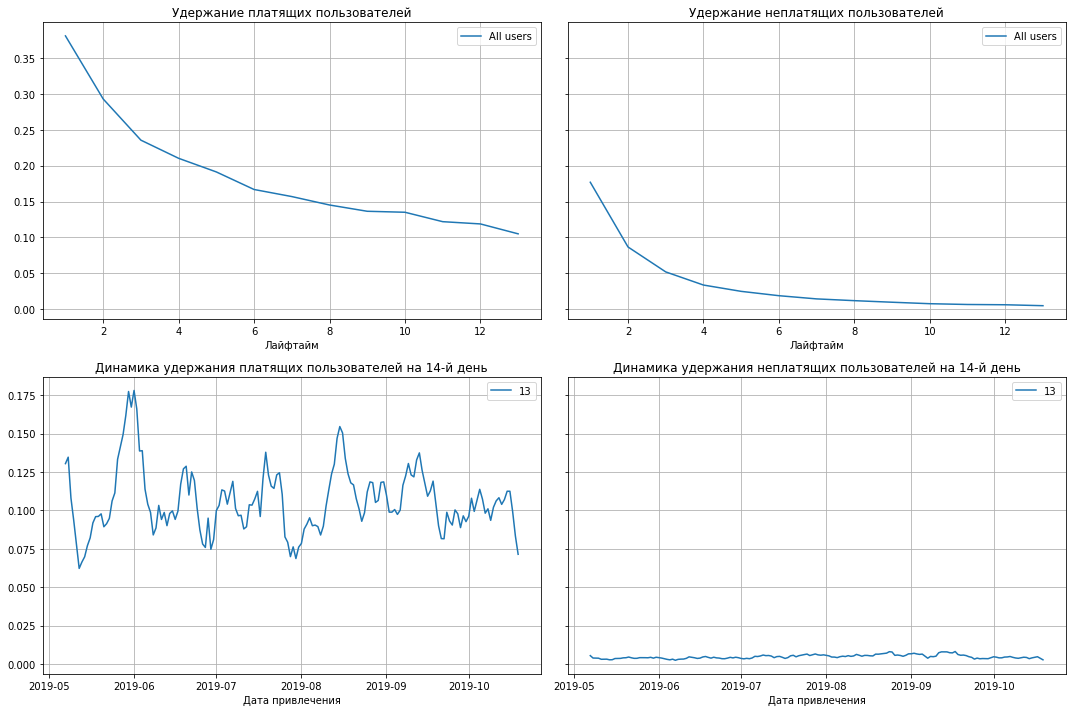

In [68]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,[]
)

plot_retention(retention, retention_history, horizon_days) 

Удержание платящих пользователей к 14 дню падает с 0.4 до 0.12, в то время как удержание неплатящих падает от 0.17 до почти 0. Динамика стабильна.

## Окупаемость рекламы с разбивкой по устройствам:

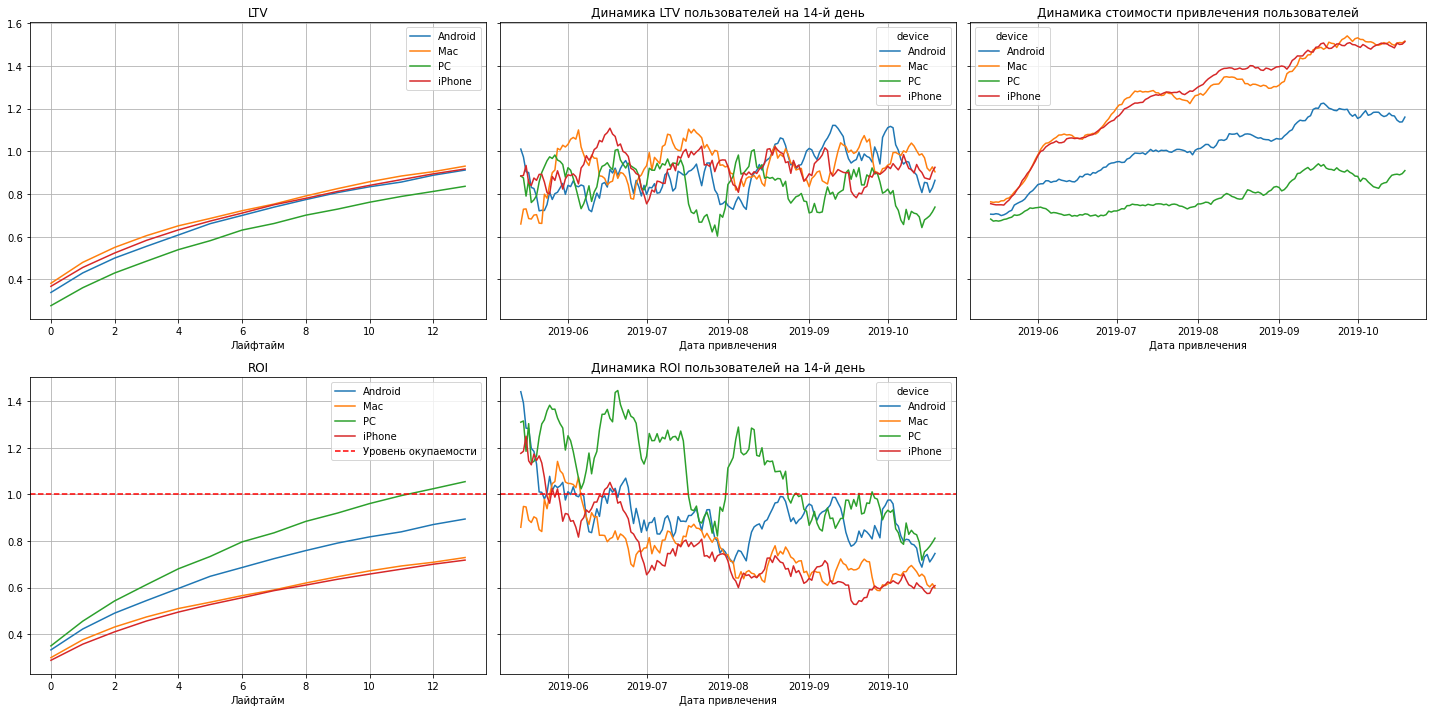

In [69]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV всех пользователей и его динамика одинаковы для всех устройств, кроме небольшого выпадания обладателей компьютера. Но САС PC дешевле все остальных девайсов, и прибыльнее (1.27, что больше на 0.2 от следующего девайса Android). А такие девайсы, как привлечение пользователей Mac и Iphone стоит дороже всего и имеет окупаемость 0.85, то есть не окупается.

## Окупаемость рекламы с разбивкой по странам:

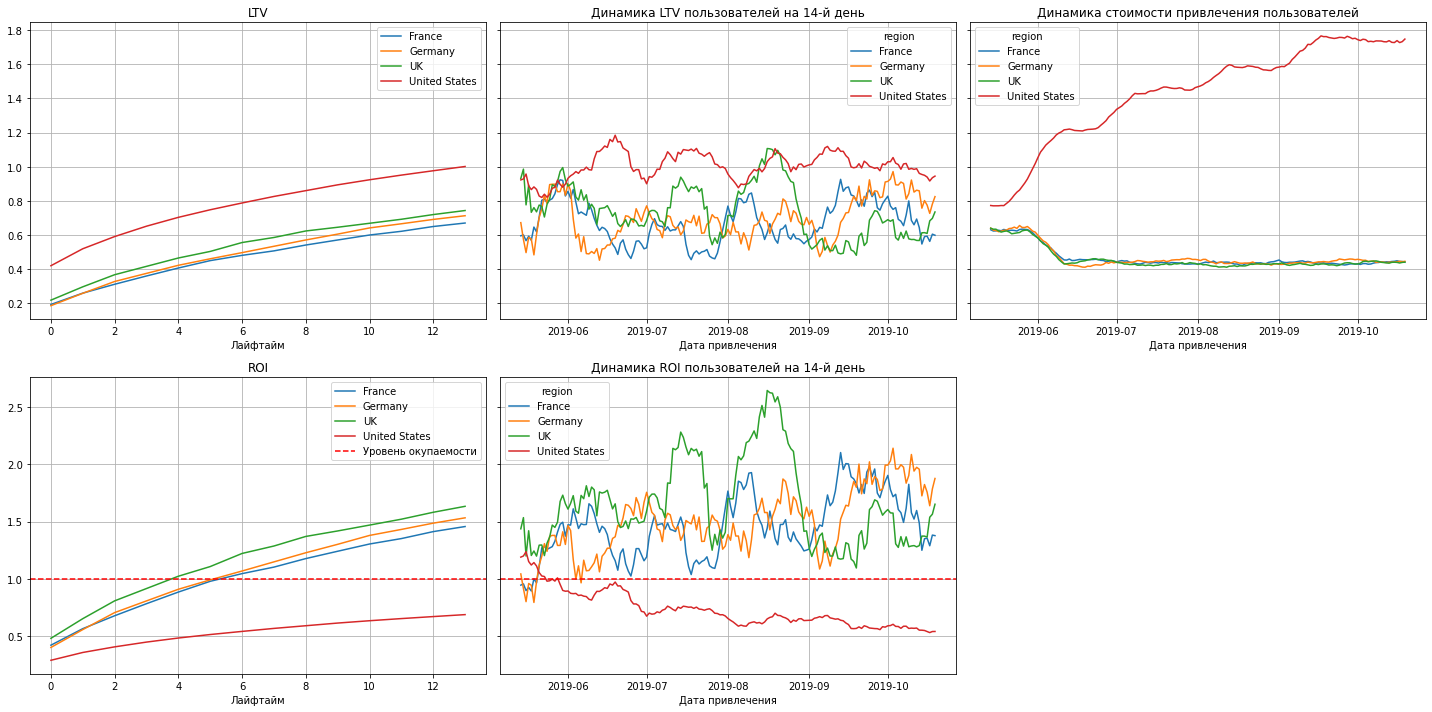

In [70]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Наибольший LTV у США, наименьший у Франции. CAC Сша в 3 раза дороже любого другого региона и постоянно растёт, в полтора раза менее окупаем, и единственный имеет отрицательную динамику ROI.

### Окупаемость рекламы с разбивкой по рекламным каналам:

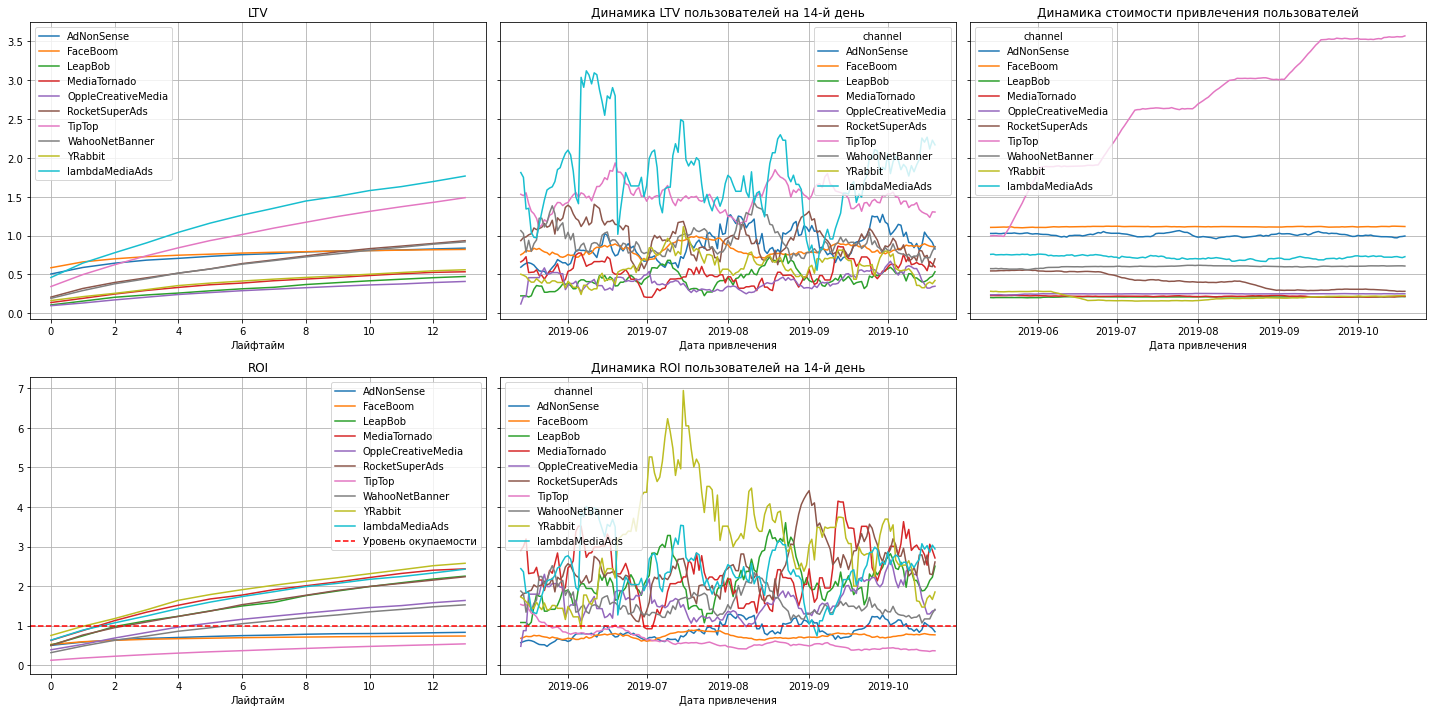

In [71]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Наибольшие LTV у каналов lambdaMediaAds и TipTop. CAC всех каналов не растут или даже падают, кроме TipTop, который обходится в >3.5 дороже по сравнению с аналогами. Соответственно, источник не окупается, как и FaceBoom и AdNonSense.

## Окупается ли реклама, направленная на привлечение пользователей в целом?

Нет, в целом реклама не окупается.

## Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Самое негативное влияние на окупаемость оказывают Mac и iPhone, а владельцы PC - самое позитивное. Самая дорогая и неокупаемая страна - США, самые окупаемые - Германия и Англия. Неокупаемы каналы рекламы - TipTop, FaceBoom, AdNonSense.

## Чем могут быть вызваны проблемы окупаемости?

САС некоторых каналов в несколько раз выше САС других, а LTV пользователя не даёт каналу окупить расходы на себя. Также стоимость рекламы в некоторых регионах значительно выше, чем в других, что негативно сказывается на общей окупаемости.

## Возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Крайне высокие и быстрорастущие расходы на определённые регионы, девайсы, источники. Необходимо уменьшить расходы на них расходы, а от определённых источников отказаться, так как на них расходы крайне высоки и в то же время не окупаемы. Также можно направить эти средства на развитие более выгодных регионов/каналов/девайсов.

# Выводы

Подавляющее большинство пользователей из Америки, которая является неокупаемым регионом (100 000 пользователей против ≈15 000 пользователй в любом другом регионе, а окупаемость Америки составляет 0.8 против 1.7-2 в других регионах. Необходимо уменьшить расходы и количество пользователей в США и увеличить в других странах. То же самое относится и к пользователям iPhone, на который тратится много средств, не окупающих себя.

Касательно каналов рекламы, более 87.5к из 105.5к тратится на каналы FaceBoom и TipTop, которые также являются убыточными, так как их САС составляет 2.8 и 1.1, что гораздо больше, чем у большинства любых других источников, а окупаемость ниже 1. Рекламу в таких источниках приобретать невыгодно.

Основная проблема маркетинга - постоянно растущий САС, в некоторых категориях он аномально высок, что пагубно сказывается на общей окупаемости, в частности это касается американского региона, пользователей Mac и iPhon, вышеназванных рекламных каналов. САС пользователей Mac и iPhon в 2 раза больше САС пользователей ПК, а окупаемость на 0.5 меньше и равна 0.7. САС США в раза выше любой другой страны, и как следствие, окупаемость ниже в 2.5 раза. Та же ситуация с каналами рекламы TipTop и FaceBoom.

Необходимо перенаправить деньги, потраченные на вышесказанные неокупаемые регионы/девайсы/каналы в иные, имеющие более низкий и не увеличивающийся со временем САС, а также имеющие более высокую окупаемость.